In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading datasets

In [2]:
beneficiary_data=pd.read_csv('datasets/Train_Beneficiarydata-1542865627584.csv')
inpatient_data=pd.read_csv('datasets/Train_Inpatientdata-1542865627584.csv')
outpatient_data=pd.read_csv('datasets/Train_Outpatientdata-1542865627584.csv')
label_data=pd.read_csv('datasets/Train-1542865627584.csv')

In [3]:
print("The Outpatient Dataset columns are:",outpatient_data.columns)
print("="*100)
print("The Inpatient Dataset columns are:",inpatient_data.columns)
print("="*100)
print("The Beneficiary Dataset columns are:",beneficiary_data.columns)

The Outpatient Dataset columns are: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')
The Inpatient Dataset columns are: Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagn

## EDA

## Beneficiary dataset

In [4]:
beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [5]:
beneficiary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

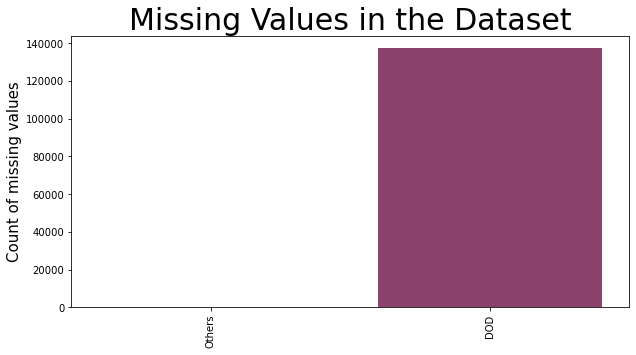

In [6]:
# Let's count number of null entries per feature
missing_values = list(beneficiary_data.isna().sum())
# missing values is a list of the number of missing values in each column
plt.rcParams["figure.figsize"] = (10,5)
cols = list(beneficiary_data.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values
# Plotting the missing values in the dataset
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="flare")
plt.xticks(rotation=90)
plt.title("Missing Values in the Dataset", fontdict = {'fontsize': 30})
plt.ylabel("Count of missing values", fontdict={'fontsize': 15})
plt.show()

### Observation
1. Only  DOD column in beneficiary dataset has null values

### Race 

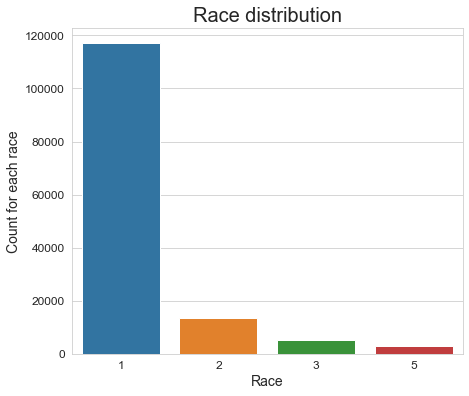

In [7]:
plt.figure(figsize=(7,6))
sns.set_style('whitegrid') 
sns.countplot(data=beneficiary_data,x='Race') 
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('Race distribution', fontsize=20)
plt.xlabel('Race', size = 14)
plt.ylabel('Count for each race', size = 14)
plt.show()

###  Observation 
1. Maximum number of beneficary belongs to race 1 followed by race 2,race 3 and race 5. 


### Gender

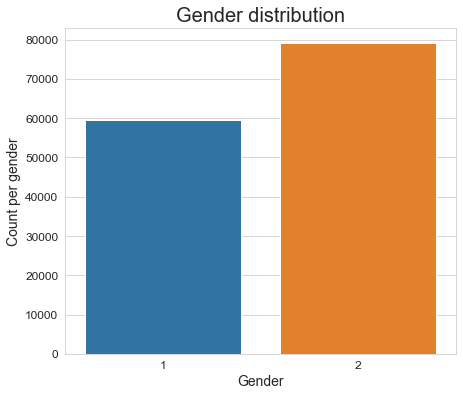

In [8]:
plt.figure(figsize=(7,6))
sns.set_style('whitegrid') 
ax=sns.countplot(data=beneficiary_data,x='Gender') 
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('Gender distribution', fontsize=20)
plt.xlabel('Gender', size = 14)
plt.ylabel('Count per gender', size = 14)
plt.show()

### Observation
1. Gender_2 is found more in beneficiary dataset than Gender_1

### State

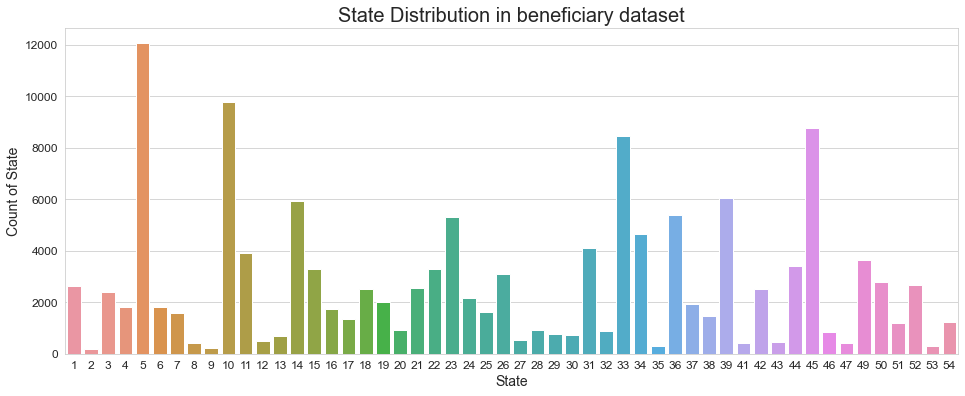

In [9]:
plt.figure(figsize=(16,6)) 
sns.set_style('whitegrid') 
sns.countplot(data=beneficiary_data,x='State')  
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('State Distribution in beneficiary dataset', fontsize=20)
plt.xlabel('State', size = 14)
plt.ylabel('Count of State', size = 14)
plt.show()

### Observation
1. Maximum beneficiaries come from state coded 5
2. Minimum beneficiaries come from state coded 2

### county

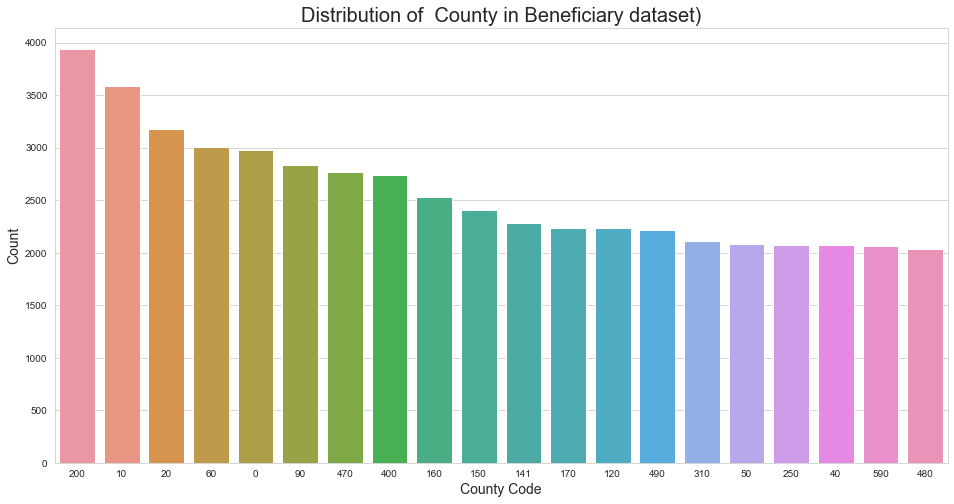

In [10]:
# Plot top 20 County from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='County',y=None, data=beneficiary_data, orient ="v", order = beneficiary_data['County'].value_counts().head(20).index)
plt.title('Distribution of  County in Beneficiary dataset)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('County Code', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

### Observation
1. Maximum beneficiaries come from county coded 200 followed by 10,20,30 and so on
2. Minimum beneficiaries come from state coded 480

### IPAnnualReimbursementAmt

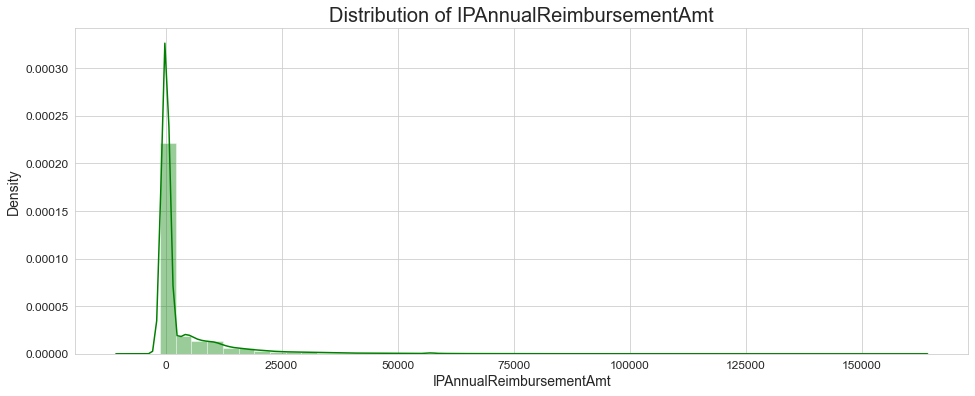

In [11]:
plt.figure(figsize=(16,6)) 
sns.set_style('whitegrid') 
sns.distplot(beneficiary_data['IPAnnualReimbursementAmt'],color='green') 
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('Distribution of IPAnnualReimbursementAmt', fontsize=20)
plt.xlabel('IPAnnualReimbursementAmt', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

### Observation
<li>Most of the inpatients recieved 0 IPAnnualReimbursementAmt
<li>Very less number of patients recived IPAnnualReimbursementAmt between 25000 to 150000


### IPAnnualDeductibleAmt

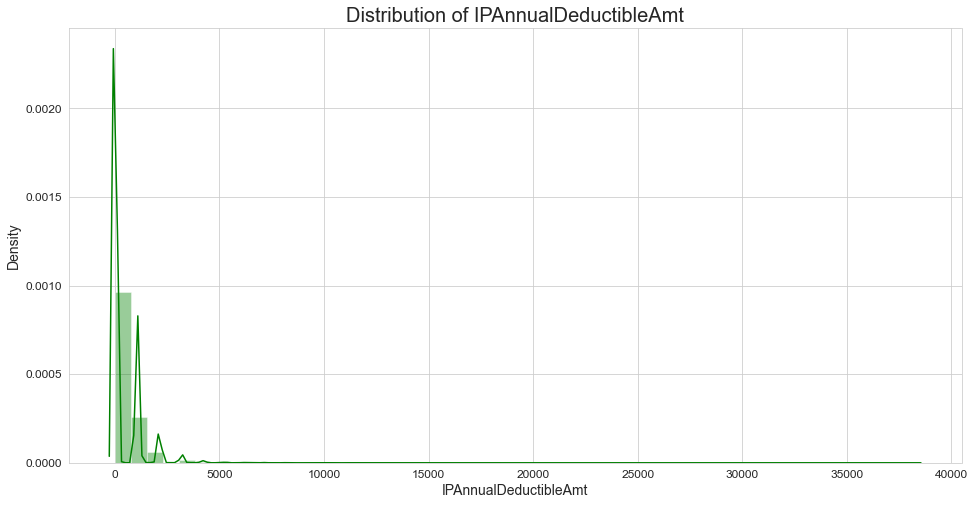

In [12]:
plt.figure(figsize=(16,8)) 
sns.set_style('whitegrid') 
sns.distplot(beneficiary_data['IPAnnualDeductibleAmt'],color='green') 
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('Distribution of IPAnnualDeductibleAmt', fontsize=20)
plt.xlabel('IPAnnualDeductibleAmt', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

### Observation
<li>Most of the IPAnnualDeductibleAmt lies between 0 and 5000
<li>Very few values lie between 5000 and 40000

### OPAnnualReimbursementAmt

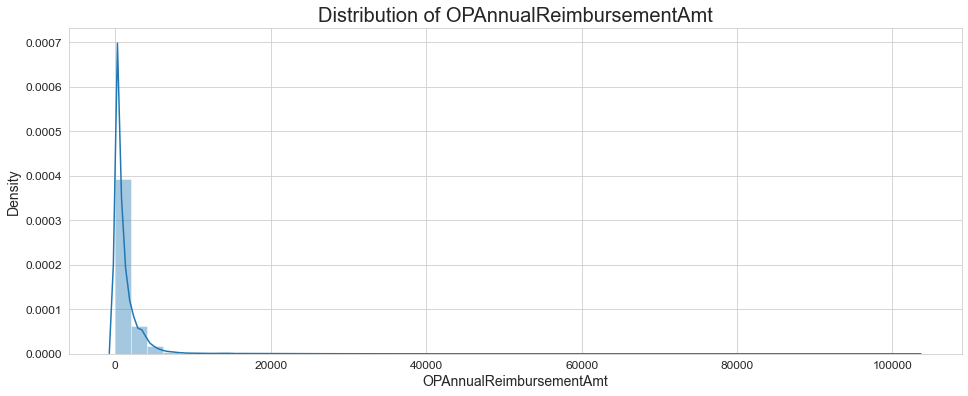

In [13]:
plt.figure(figsize=(16,6)) 
sns.set_style('whitegrid') 
sns.distplot(beneficiary_data['OPAnnualReimbursementAmt']) 
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('Distribution of OPAnnualReimbursementAmt', fontsize=20)
plt.xlabel('OPAnnualReimbursementAmt', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

### Observations
<li>Most of the outpatients got AnnualReimbursementAmt in range of 0 to 10000
<li>Maximum amount reimbursed by an outpatient is 100000

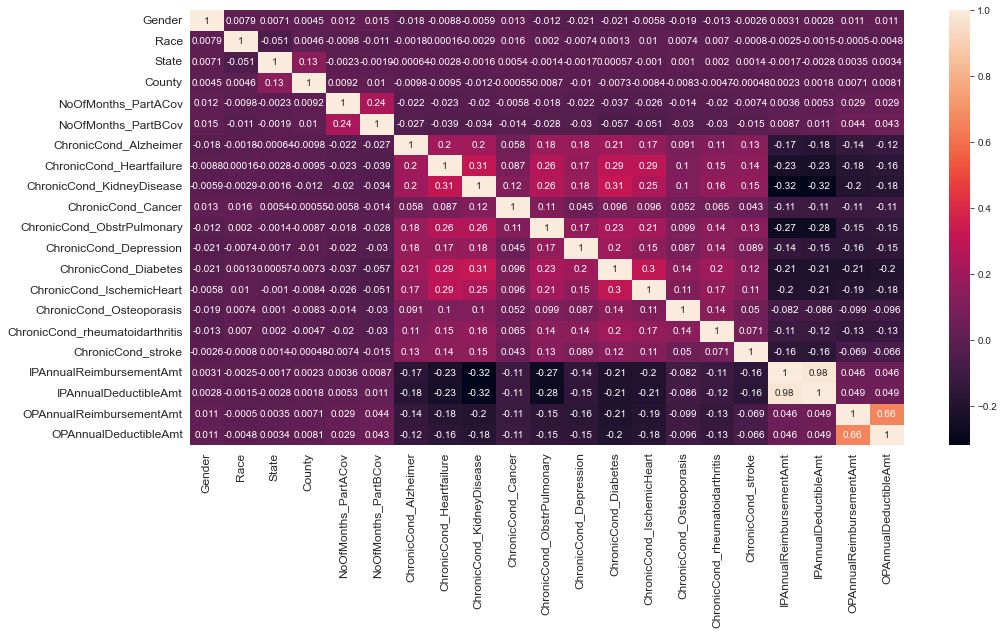

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(beneficiary_data.corr(method='spearman'), annot = True)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

### Observation
1. IPAnnualReimbursementAmt is highly corelated with IPAnnualDeductibleAmt with 0.98 value
2. OPAnnualReimbursementAmt is  corelated with OPAnnualDeductibleAmt with 0.66 value

## Inpatient dataset

In [15]:
inpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [16]:
inpatient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

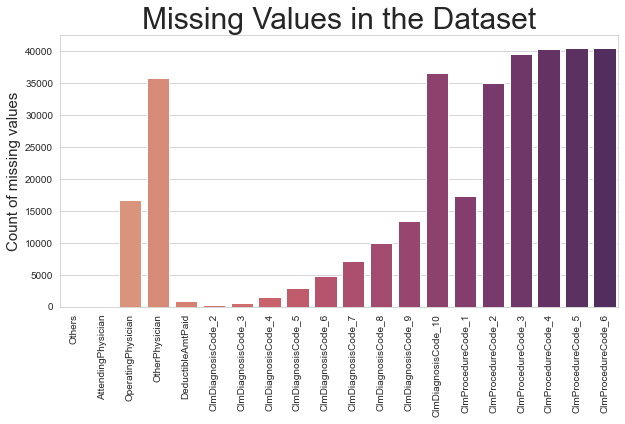

In [17]:
# Let's count number of null entries per feature
missing_values = list(inpatient_data.isna().sum())
# missing values is a list of the number of missing values in each column
plt.rcParams["figure.figsize"] = (10,5)
cols = list(inpatient_data.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values
# Plotting the missing values in the dataset
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="flare")
plt.xticks(rotation=90)
plt.title("Missing Values in the Dataset", fontdict = {'fontsize': 30})
plt.ylabel("Count of missing values", fontdict={'fontsize': 15})
plt.show()

### Observation
<li>Maximum missing values are in column ClaimProcedure_6 and ClaimProcedure_5 
<li>Very few missing values are in Attending Physician column

## Attending Physician

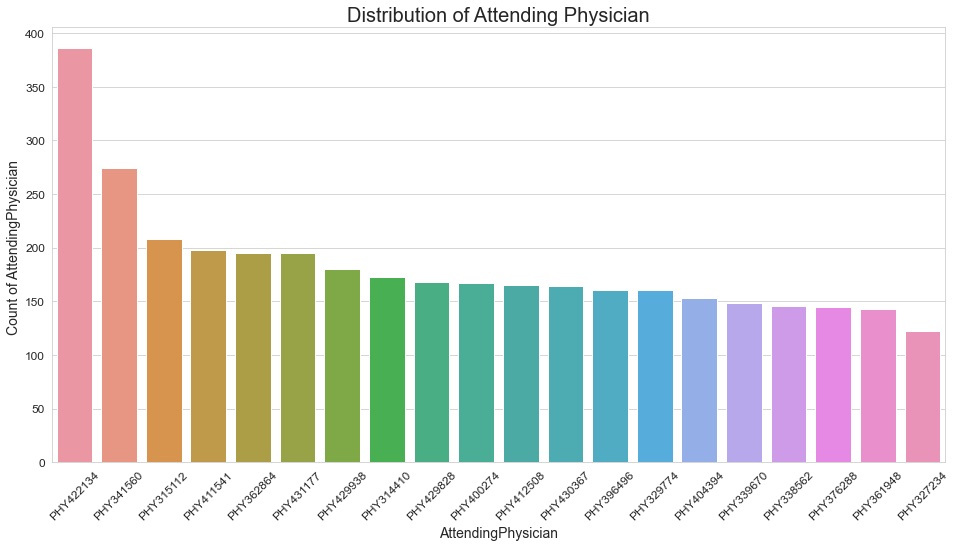

In [18]:
plt.figure(figsize=(16,8)) 
sns.set_style('whitegrid') 
sns.countplot(data=inpatient_data,x='AttendingPhysician',order=inpatient_data['AttendingPhysician'].value_counts()[:20].index) # name of the category(index)  
plt.xticks(rotation=45,size = 12)
plt.yticks(size = 12) 
plt.title('Distribution of Attending Physician', fontsize=20)
plt.xlabel('AttendingPhysician', size = 14)
plt.ylabel('Count of AttendingPhysician ', size = 14)
plt.show()

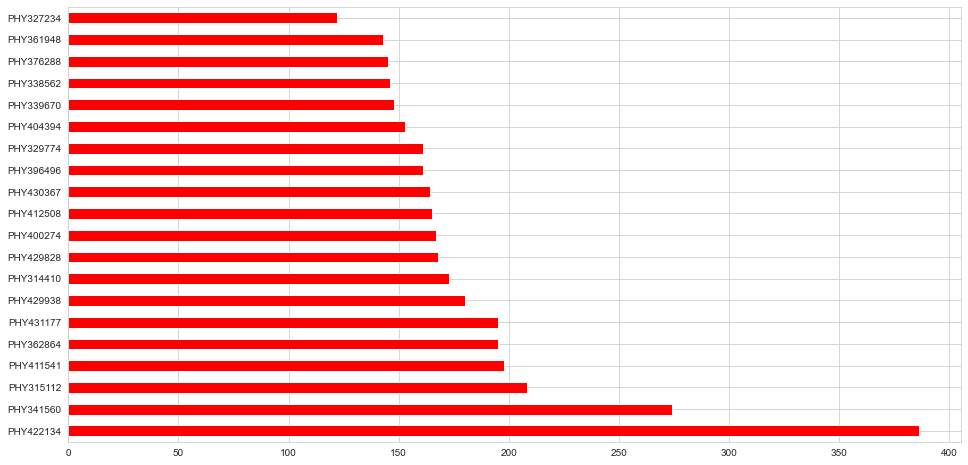

In [19]:
plt.figure(figsize=(16, 8))
inpatient_data.AttendingPhysician.value_counts().head(20).plot( x=inpatient_data.AttendingPhysician , kind = 'barh', color="red");

### Observation
<li>Most Attending physician for inpatients is PHY422134
<li>Least Attending physician for inpatients is PHY327234

## Operating Physician

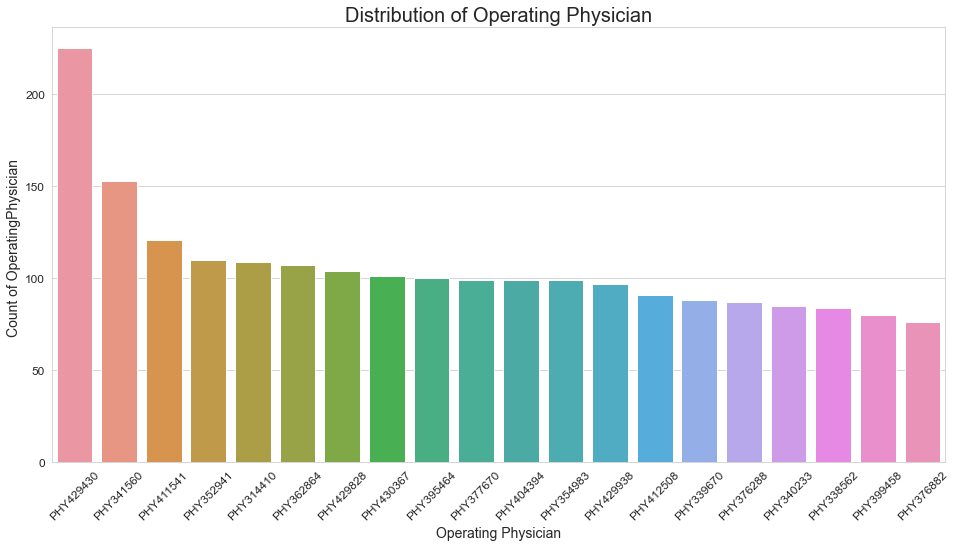

In [20]:
plt.figure(figsize=(16,8)) 
sns.set_style('whitegrid') 
sns.countplot(data=inpatient_data,x='OperatingPhysician',order=inpatient_data['OperatingPhysician'].value_counts()[:20].index) # name of the category(index)  
plt.xticks(rotation=45,size = 12)
plt.yticks(size = 12) 
plt.title('Distribution of Operating Physician', fontsize=20)
plt.xlabel('Operating Physician', size = 14)
plt.ylabel('Count of OperatingPhysician ', size = 14)
plt.show()

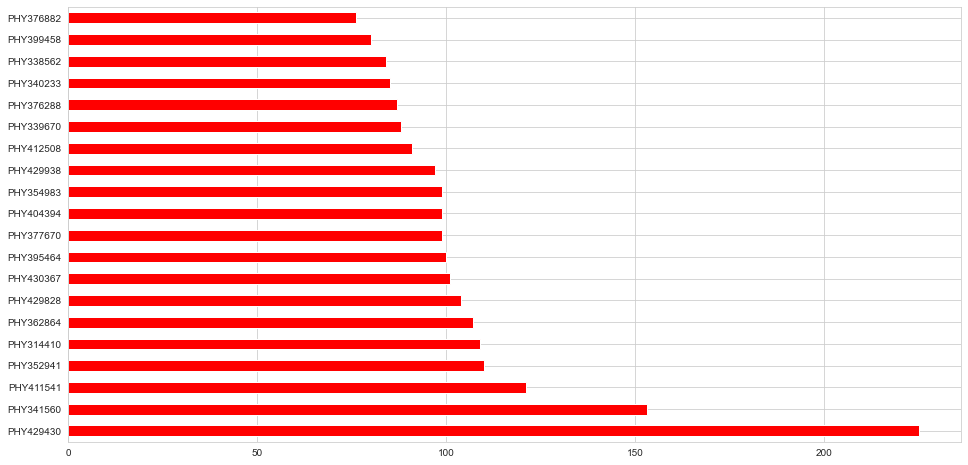

In [21]:
plt.figure(figsize=(16, 8))
inpatient_data.OperatingPhysician.value_counts().head(20).plot( x=inpatient_data.OperatingPhysician , kind = 'barh', color="red");

### Observation
<li>Most Operating physician for inpatients is PHY429430
<li>Least Operating physician for inpatients is PHY376882

## Other Physician

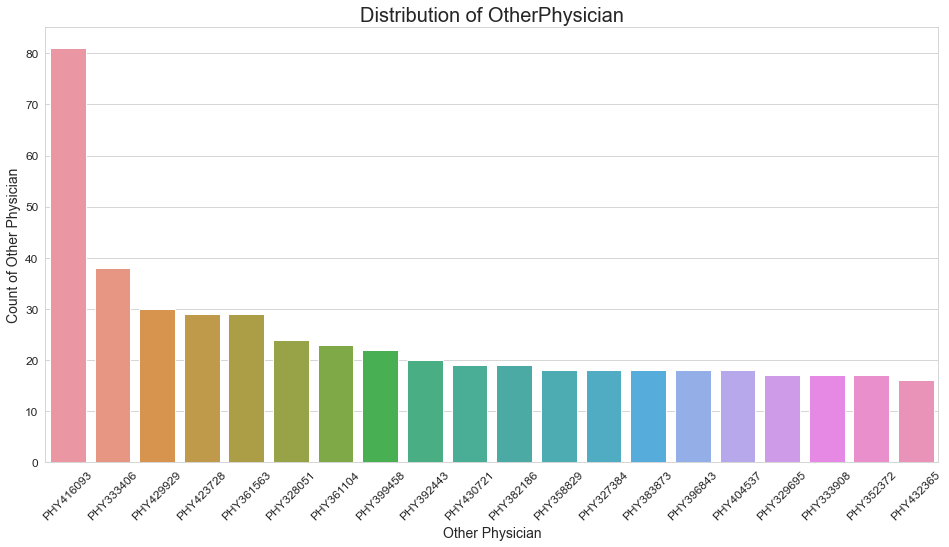

In [22]:
plt.figure(figsize=(16,8)) 
sns.set_style('whitegrid') 
sns.countplot(data=inpatient_data,x='OtherPhysician',order=inpatient_data['OtherPhysician'].value_counts()[:20].index) # name of the category(index)  
plt.xticks(rotation=45,size = 12)
plt.yticks(size = 12) 
plt.title('Distribution of OtherPhysician', fontsize=20)
plt.xlabel('Other Physician', size = 14)
plt.ylabel('Count of Other Physician', size = 14)
plt.show()

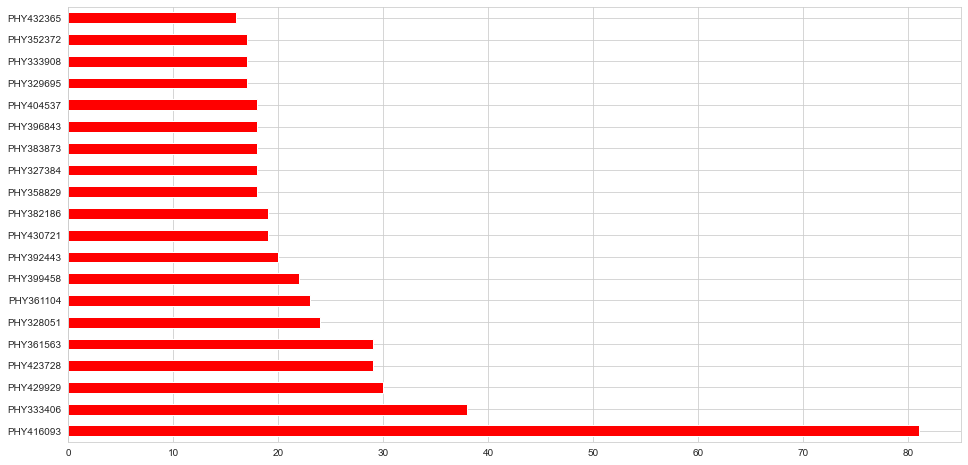

In [23]:
plt.figure(figsize=(16, 8))
inpatient_data.OtherPhysician.value_counts().head(20).plot( x=inpatient_data.OtherPhysician , kind = 'barh', color="red");

### Observation
<li>Top most other physician for inpatients is PHY416093,followed by PHY333406

## DiagnosisGroupCode

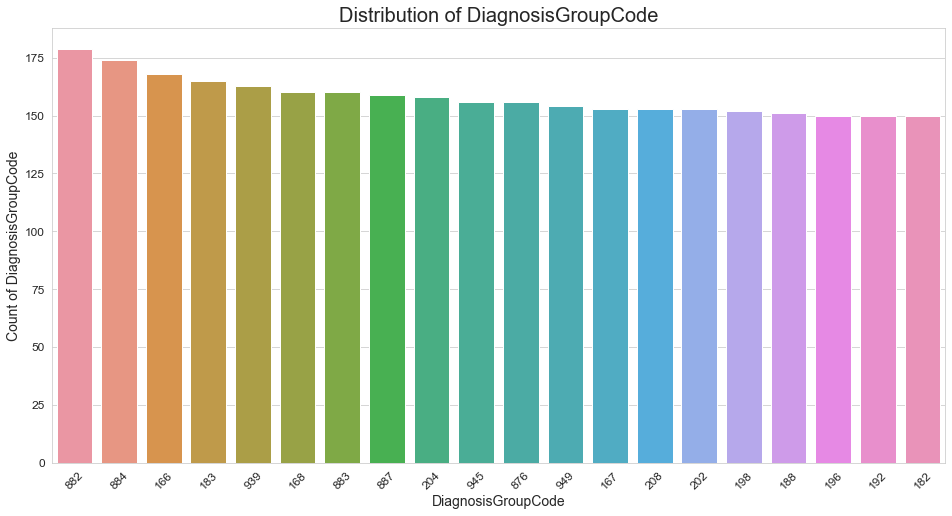

In [24]:
plt.figure(figsize=(16,8)) 
sns.set_style('whitegrid') 
sns.countplot(data=inpatient_data,x='DiagnosisGroupCode',order=inpatient_data['DiagnosisGroupCode'].value_counts()[:20].index) # name of the category(index)  
plt.xticks(rotation=45,size = 12)
plt.yticks(size = 12) 
plt.title('Distribution of DiagnosisGroupCode', fontsize=20)
plt.xlabel('DiagnosisGroupCode', size = 14)
plt.ylabel('Count of DiagnosisGroupCode', size = 14)
plt.show()

<li>Maximum patients admitted in the hospital are diagnosed with 882
<li>Some codes have same count

## ProcedureCode

In [25]:
IP_ClmProcedureCode_df = pd.DataFrame(columns = ['ProcedureCode'])
IP_ClmProcedureCode_df['ProcedureCode'] = pd.concat([inpatient_data["ClmProcedureCode_1"], 
                                   inpatient_data["ClmProcedureCode_2"],
                                   inpatient_data["ClmProcedureCode_3"],
                                   inpatient_data["ClmProcedureCode_4"], 
                                   inpatient_data["ClmProcedureCode_5"], 
                                   inpatient_data["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

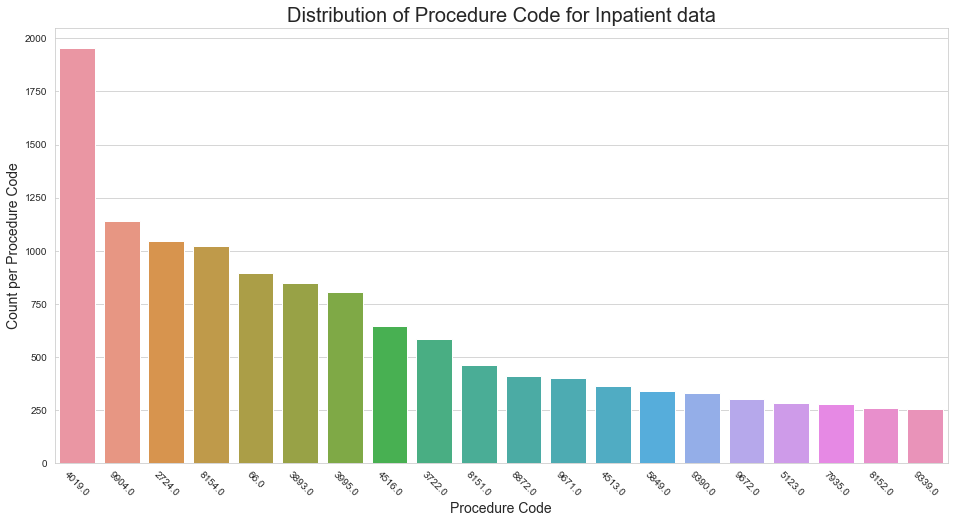

In [26]:
plt.figure(figsize=(16, 8))
sns.countplot(x='ProcedureCode',y=None, data=IP_ClmProcedureCode_df, orient ="v", order = IP_ClmProcedureCode_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code for Inpatient data', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count per Procedure Code', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

### Observation
<li>Maximum procedure code followed on inpatient data is 4019,followed by 9904,2724
<li>least procedure code followed is 9339

## diagnosis Code

In [27]:
# Concat all the claim DiagnosisCodes in a single dataframe
IP_ClmDiagnosisCode_df = pd.DataFrame(columns = ['DiagnosisCode'])

IP_ClmDiagnosisCode_df['DiagnosisCode'] = pd.concat([inpatient_data["ClmDiagnosisCode_1"], 
                                           inpatient_data["ClmDiagnosisCode_2"], 
                                           inpatient_data["ClmDiagnosisCode_3"], 
                                           inpatient_data["ClmDiagnosisCode_4"],
                                           inpatient_data["ClmDiagnosisCode_5"], 
                                           inpatient_data["ClmDiagnosisCode_6"],
                                           inpatient_data["ClmDiagnosisCode_7"],
                                           inpatient_data["ClmDiagnosisCode_8"],
                                           inpatient_data["ClmDiagnosisCode_9"],
                                           inpatient_data["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

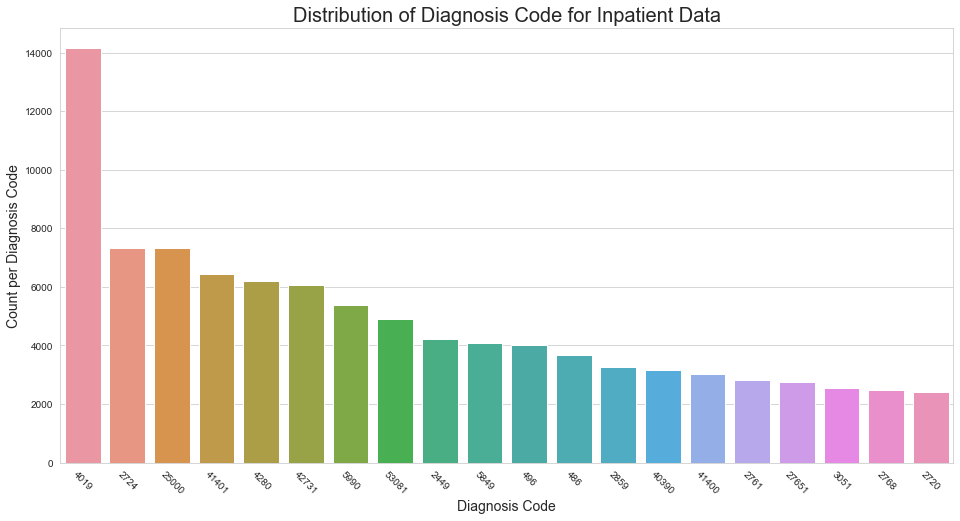

In [28]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=IP_ClmDiagnosisCode_df, orient ="v", order = IP_ClmDiagnosisCode_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code for Inpatient Data', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count per Diagnosis Code', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

### Observation
<li>Maximum diagnosis code followed on inpatient data is 4019,followed by 2724,25000 and so on
<li>least procedure code followed is 2720

## InscClaimAmtReimbursed

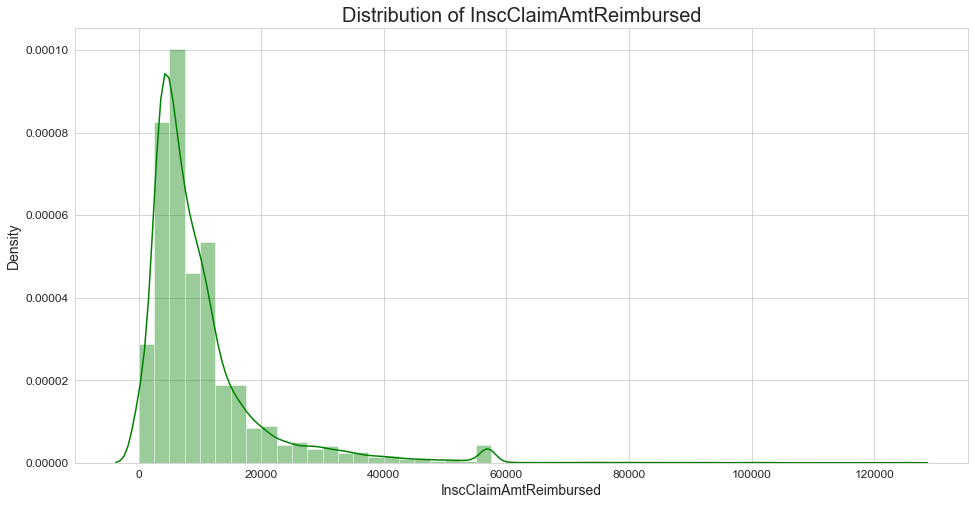

In [29]:
plt.figure(figsize=(16,8)) 
sns.set_style('whitegrid') 
sns.distplot(inpatient_data['InscClaimAmtReimbursed'],color='green') 
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('Distribution of InscClaimAmtReimbursed', fontsize=20)
plt.xlabel('InscClaimAmtReimbursed', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

### Observation
<li>Maximum InscClaimAmtReimbursed for inpatient data lies between 0 and 20000
<li>very few values lie between 60000  and 120000

## DeductibleAmtPaid

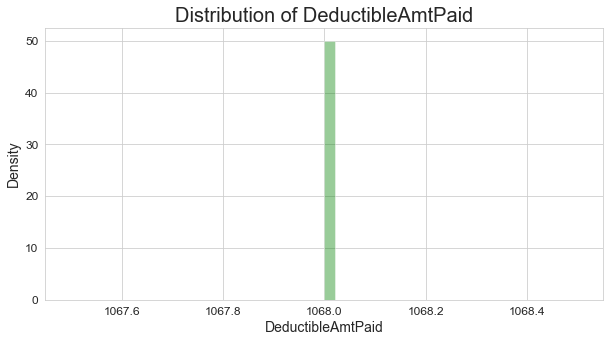

In [30]:
plt.figure(figsize=(10,5)) 
sns.set_style('whitegrid') 
sns.distplot(inpatient_data['DeductibleAmtPaid'],color='green') 
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('Distribution of DeductibleAmtPaid', fontsize=20)
plt.xlabel('DeductibleAmtPaid', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

### Observation
<li>DeductibleAmtPaid vlue is 1068

## Outpatient Dataset

In [31]:
outpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [32]:
outpatient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

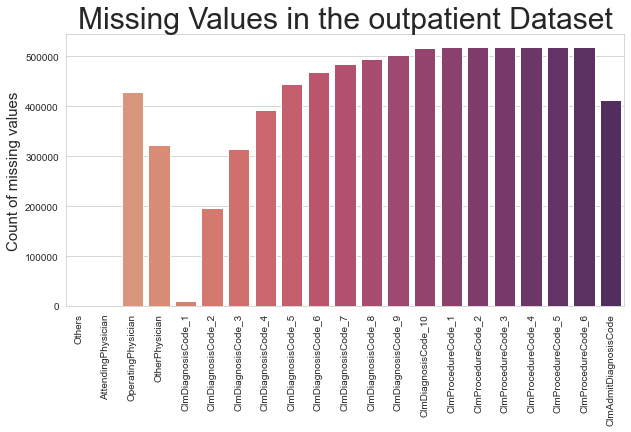

In [33]:
missing_values = list(outpatient_data.isna().sum())
# missing values is a list of the number of missing values in each column
plt.rcParams["figure.figsize"] = (10,5)
cols = list(outpatient_data.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values
# Plotting the missing values in the dataset
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="flare")
plt.xticks(rotation=90)
plt.title("Missing Values in the outpatient Dataset", fontdict = {'fontsize': 30})
plt.ylabel("Count of missing values", fontdict={'fontsize': 15})
plt.show()

### Observation
<li>Maximum missing values are in columns ClmProcedureCode_5 and  ClmProcedureCode_6
<li>Very few missing values are in Attending Physician column

## Attending Physician

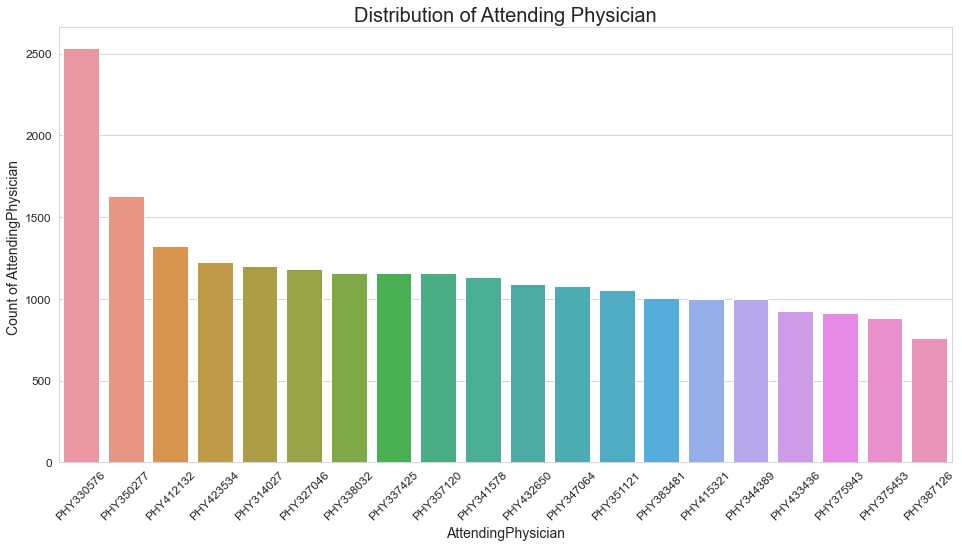

In [34]:
plt.figure(figsize=(16,8)) 
sns.set_style('whitegrid') 
sns.countplot(data=outpatient_data,x='AttendingPhysician',order=outpatient_data['AttendingPhysician'].value_counts()[:20].index) # name of the category(index)  
plt.xticks(rotation=45,size = 12)
plt.yticks(size = 12) 
plt.title('Distribution of Attending Physician', fontsize=20)
plt.xlabel('AttendingPhysician', size = 14)
plt.ylabel('Count of AttendingPhysician ', size = 14)
plt.show()

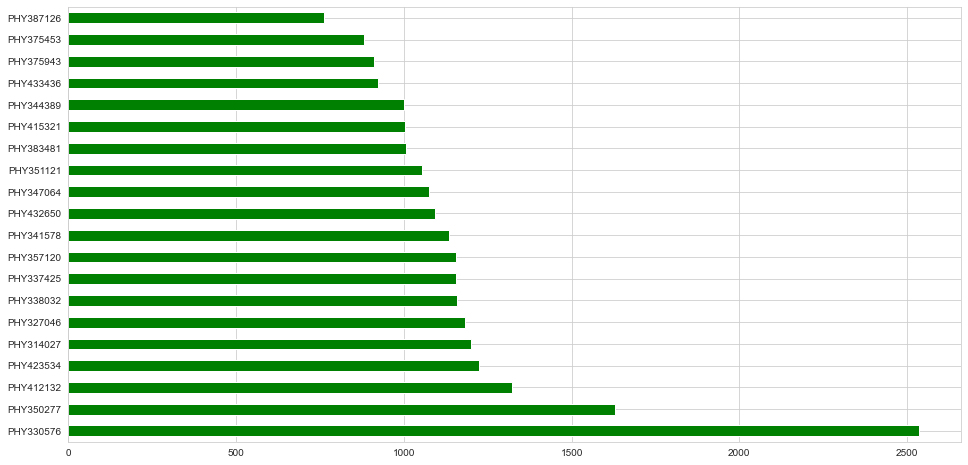

In [35]:
plt.figure(figsize=(16, 8))
outpatient_data.AttendingPhysician.value_counts().head(20).plot( x=outpatient_data.AttendingPhysician , kind = 'barh', color="green");

### Observation
<li>Most Attending physician for inpatients is PHY33056
<li>Least Attending physician for inpatients is PHY387126

## Operating Physician

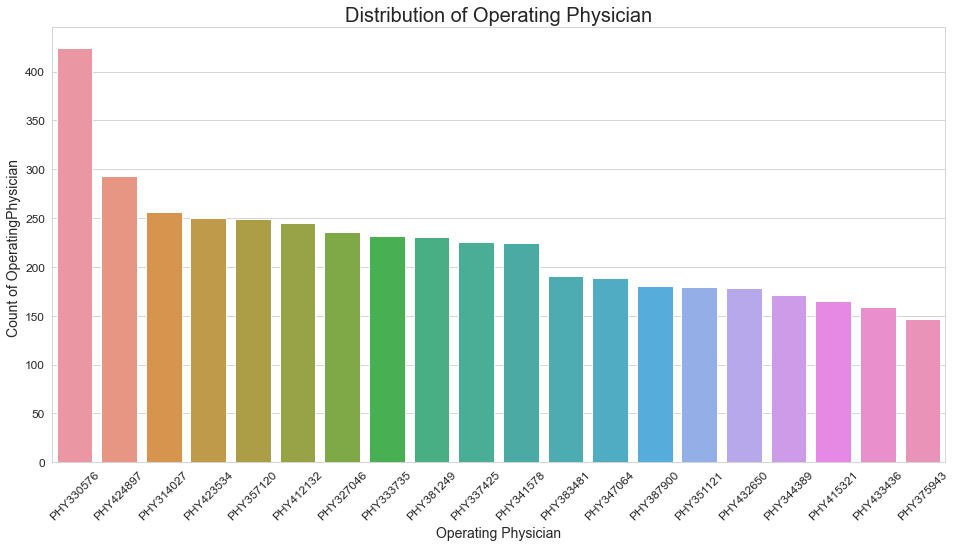

In [36]:
plt.figure(figsize=(16,8)) 
sns.set_style('whitegrid') 
sns.countplot(data=outpatient_data,x='OperatingPhysician',order=outpatient_data['OperatingPhysician'].value_counts()[:20].index) # name of the category(index)  
plt.xticks(rotation=45,size = 12)
plt.yticks(size = 12) 
plt.title('Distribution of Operating Physician', fontsize=20)
plt.xlabel('Operating Physician', size = 14)
plt.ylabel('Count of OperatingPhysician ', size = 14)
plt.show()

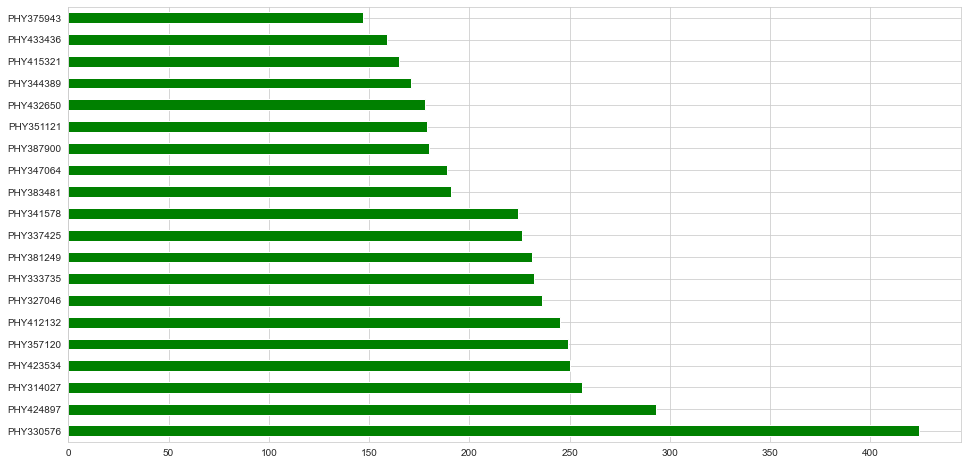

In [37]:
plt.figure(figsize=(16, 8))
outpatient_data.OperatingPhysician.value_counts().head(20).plot( x=outpatient_data.OperatingPhysician , kind = 'barh', color="green");

### Observation
<li>Most Operating physician for outpatients is PHY330576
<li>Least Operating physician for outpatients is PHY375943

## Other Physician

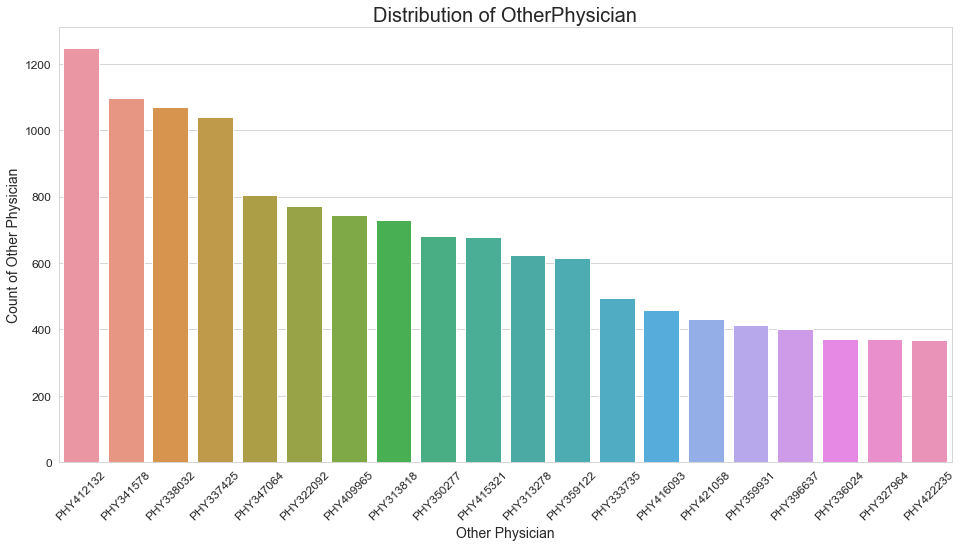

In [38]:
plt.figure(figsize=(16,8)) 
sns.set_style('whitegrid') 
sns.countplot(data=outpatient_data,x='OtherPhysician',order=outpatient_data['OtherPhysician'].value_counts()[:20].index) # name of the category(index)  
plt.xticks(rotation=45,size = 12)
plt.yticks(size = 12) 
plt.title('Distribution of OtherPhysician', fontsize=20)
plt.xlabel('Other Physician', size = 14)
plt.ylabel('Count of Other Physician', size = 14)
plt.show()

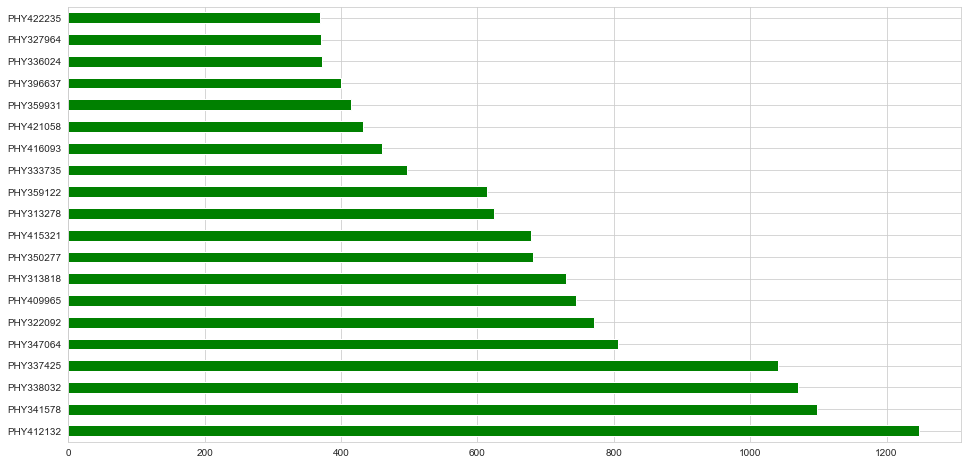

In [39]:
plt.figure(figsize=(16, 8))
outpatient_data.OtherPhysician.value_counts().head(20).plot( x=outpatient_data.OtherPhysician , kind = 'barh', color="green");

### Observation
<li>Top most other physician for inpatients is PHY416093,followed by PHY333406

## ProcedureCode

In [40]:
OP_ClmProcedureCode_df = pd.DataFrame(columns = ['ProcedureCode'])
OP_ClmProcedureCode_df['ProcedureCode'] = pd.concat([outpatient_data["ClmProcedureCode_1"], 
                                   outpatient_data["ClmProcedureCode_2"],
                                   outpatient_data["ClmProcedureCode_3"],
                                   outpatient_data["ClmProcedureCode_4"], 
                                   outpatient_data["ClmProcedureCode_5"], 
                                   outpatient_data["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

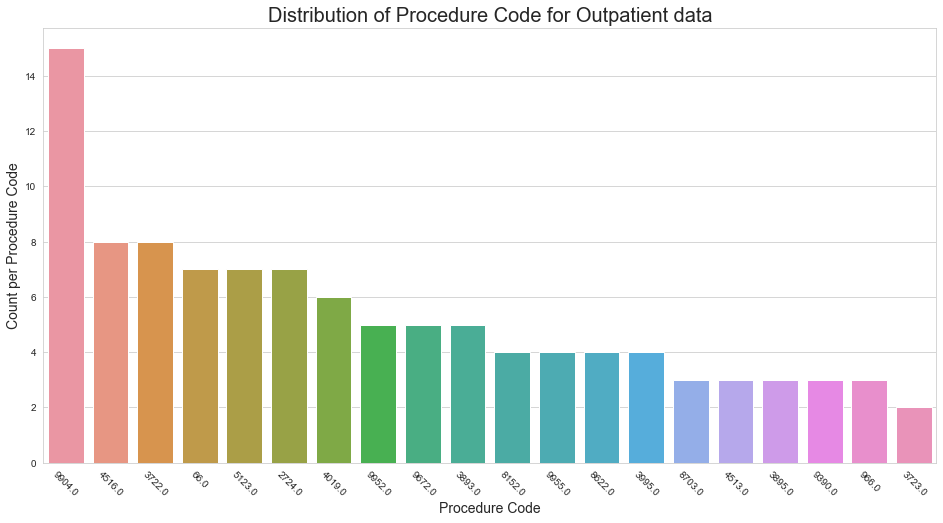

In [41]:
plt.figure(figsize=(16, 8))
sns.countplot(x='ProcedureCode',y=None, data=OP_ClmProcedureCode_df, orient ="v", order = OP_ClmProcedureCode_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code for Outpatient data', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count per Procedure Code', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

### Observation
<li>Maximum procedure code followed on outpatient data is 9904,followed by 4516,3722
<li>least procedure code followed is 3723

## diagnosis Code

In [42]:
# Concat all the claim DiagnosisCodes in a single dataframe
OP_ClmDiagnosisCode_df = pd.DataFrame(columns = ['DiagnosisCode'])

OP_ClmDiagnosisCode_df['DiagnosisCode'] = pd.concat([outpatient_data["ClmDiagnosisCode_1"], 
                                           outpatient_data["ClmDiagnosisCode_2"], 
                                           outpatient_data["ClmDiagnosisCode_3"], 
                                           outpatient_data["ClmDiagnosisCode_4"],
                                           outpatient_data["ClmDiagnosisCode_5"], 
                                           outpatient_data["ClmDiagnosisCode_6"],
                                           outpatient_data["ClmDiagnosisCode_7"],
                                           outpatient_data["ClmDiagnosisCode_8"],
                                           outpatient_data["ClmDiagnosisCode_9"],
                                           outpatient_data["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

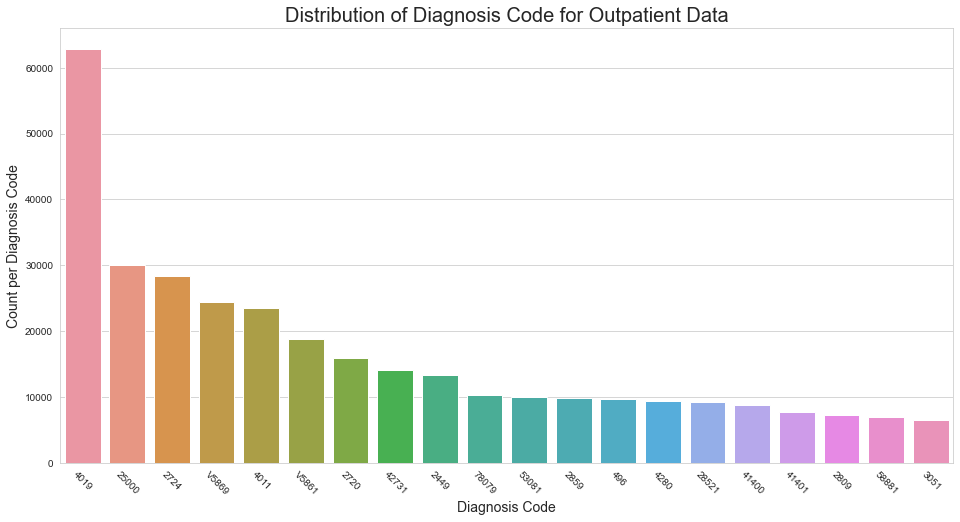

In [43]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=OP_ClmDiagnosisCode_df, orient ="v", order = OP_ClmDiagnosisCode_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code for Outpatient Data', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count per Diagnosis Code', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

### Observation
<li>Maximum diagnosis code for outpatient data is 4019,followed by 25000,2724, and so on
<li>least procedure code followed is 3051

## InscClaimAmtReimbursed

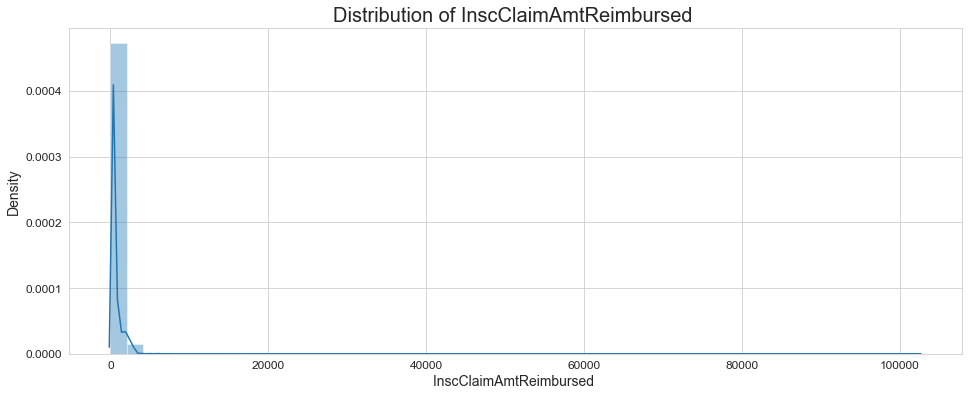

In [44]:
plt.figure(figsize=(16,6)) 
sns.set_style('whitegrid') 
sns.distplot(outpatient_data['InscClaimAmtReimbursed']) 
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('Distribution of InscClaimAmtReimbursed ', fontsize=20)
plt.xlabel('InscClaimAmtReimbursed ', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

### Observations
<li> Most values lie between 0 and 5000
<li>very few values lie between 20000 and 100000 that means in very few scenarios InscClaimAmtReimbursed lies between 20000 and 100000


## Provider Dataset

In [45]:
label_data.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [46]:
#checking tain_label information
label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


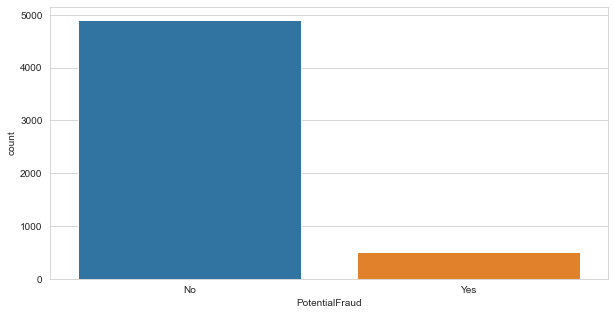

In [47]:
sns.countplot('PotentialFraud',data=label_data);

<h2>Conclusion</h2>
<ol>
<li>Dataset is imbalanced </li>
</ol>

## Percentage of fraudulent encounters related to  Inpatient  and Outpatient datasets

In [48]:
only_fraud_provider = label_data.loc[label_data['PotentialFraud']=='Yes']
print("Dataset shape : ", only_fraud_provider.shape)
only_fraud_provider.head(5)

Dataset shape :  (506, 2)


,Provider,PotentialFraud
1,PRV51003,Yes
3,PRV51005,Yes
13,PRV51021,Yes
25,PRV51037,Yes
37,PRV51052,Yes


In [49]:
fraud_provider_inpatient_df = pd.merge(inpatient_data, only_fraud_provider, how='inner', on='Provider')
print("Dataset shape : ", fraud_provider_inpatient_df.shape)
fraud_provider_inpatient_df.head(5)

Dataset shape :  (23402, 31)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes


In [50]:
print("Dataset shape : ", fraud_provider_inpatient_df.shape)
print("Percentage of fraud cases for inpatinet data : ",(fraud_provider_inpatient_df.shape[0]/inpatient_data.shape[0])*100)

Dataset shape :  (23402, 31)
Percentage of fraud cases for inpatinet data :  57.81983495577408


<h2>Conclusion</h2>
<li>Around 58 % of the inpatient data for training has fradulent encounter</li>

In [51]:
fraud_provider_outpatient_df = pd.merge(outpatient_data, only_fraud_provider, how='inner', on='Provider')
print("Dataset shape : ", fraud_provider_outpatient_df.shape)
fraud_provider_outpatient_df.head(5)

Dataset shape :  (189394, 28)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes


In [52]:
fraud_provider_outpatient_df = pd.merge(outpatient_data, only_fraud_provider, how='inner', on='Provider')
print("Dataset shape : ", fraud_provider_outpatient_df.shape)
fraud_provider_outpatient_df.head(5)

Dataset shape :  (189394, 28)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes


In [53]:
print("Dataset shape : ", fraud_provider_outpatient_df.shape)
print("Percentage of fraud cases for outpatinet data : ",(fraud_provider_outpatient_df.shape[0]/outpatient_data.shape[0])*100)

Dataset shape :  (189394, 28)
Percentage of fraud cases for outpatinet data :  36.58112130290089


<h2>Conclusion</h2>
<li>Around 37 % of the outpatient data for training has fradulent encounter</li>

## Top 20 used procedure codes and diagnosis codes used by the potential fraudulent providers 

## Inpatient - Procedure

In [54]:
#create a dataframe for concatinating all Procedure Code columns  
inpatient_df = pd.DataFrame(columns = ['ProcedureCode'])
inpatient_df['ProcedureCode'] = pd.concat([fraud_provider_inpatient_df["ClmProcedureCode_1"], 
                                           fraud_provider_inpatient_df["ClmProcedureCode_2"],
                                           fraud_provider_inpatient_df["ClmProcedureCode_3"],
                                           fraud_provider_inpatient_df["ClmProcedureCode_4"], 
                                           fraud_provider_inpatient_df["ClmProcedureCode_5"], 
                                           fraud_provider_inpatient_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()




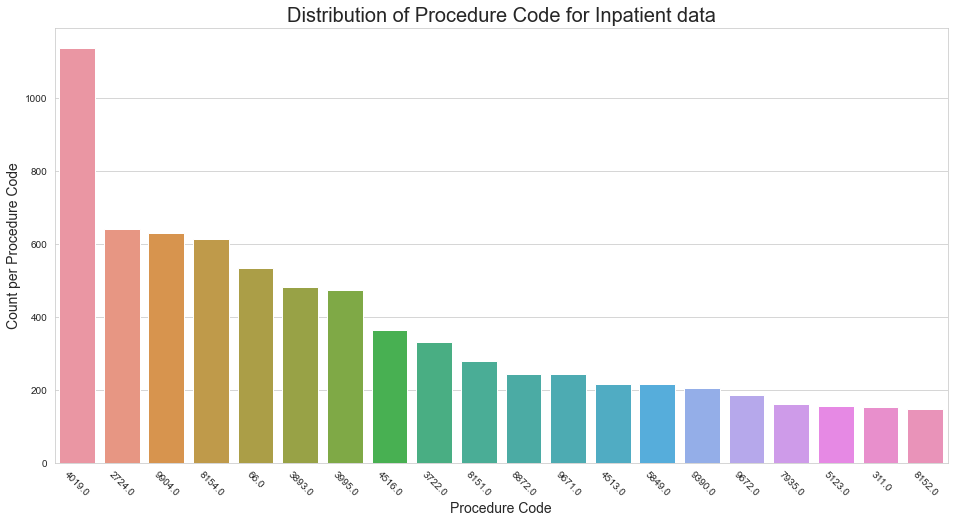

In [55]:
plt.figure(figsize=(16, 8))
sns.countplot(x='ProcedureCode',y=None, data=inpatient_df, orient ="v", order = inpatient_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code for Inpatient data', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count per Procedure Code', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

## Inpatient - Diagnosis

In [56]:
#create a dataframe for concatinating all DiagnosisCode Code columns  

inpatient_df = pd.DataFrame(columns = ['DiagnosisCode'])
inpatient_df['DiagnosisCode'] = pd.concat([fraud_provider_inpatient_df["ClmDiagnosisCode_1"], 
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_2"], 
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_3"], 
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_4"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_5"], 
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_6"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_7"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_8"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_9"],
                                           fraud_provider_inpatient_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()



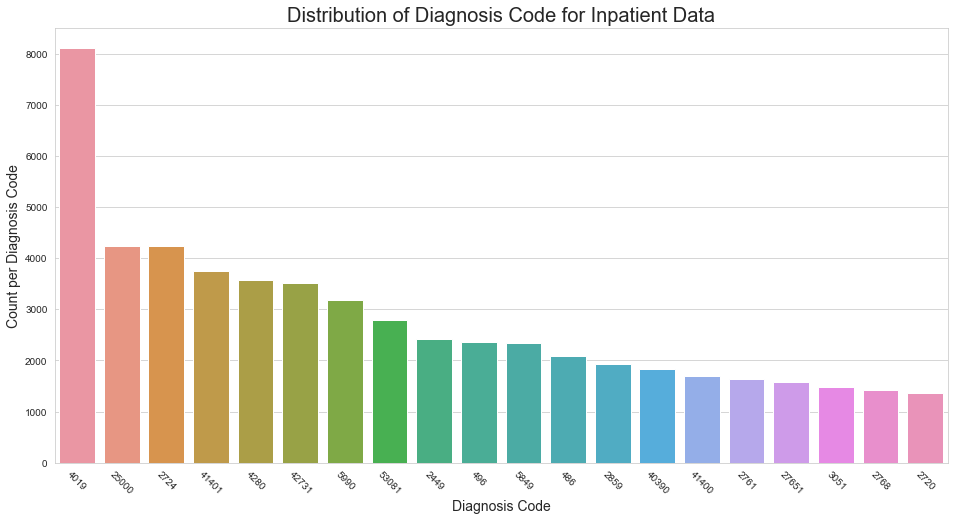

In [57]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=inpatient_df, orient ="v", order = inpatient_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code for Inpatient Data', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count per Diagnosis Code', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

## Outpatient - Procedure

In [58]:
#create a dataframe for concatinating all Procedure Code columns  
outpatient_df = pd.DataFrame(columns = ['ProcedureCode'])
outpatient_df['ProcedureCode'] = pd.concat([fraud_provider_outpatient_df["ClmProcedureCode_1"], 
                                           fraud_provider_outpatient_df["ClmProcedureCode_2"],
                                           fraud_provider_outpatient_df["ClmProcedureCode_3"],
                                           fraud_provider_outpatient_df["ClmProcedureCode_4"], 
                                           fraud_provider_outpatient_df["ClmProcedureCode_5"], 
                                           fraud_provider_outpatient_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

print(outpatient_df.shape)


(90, 1)


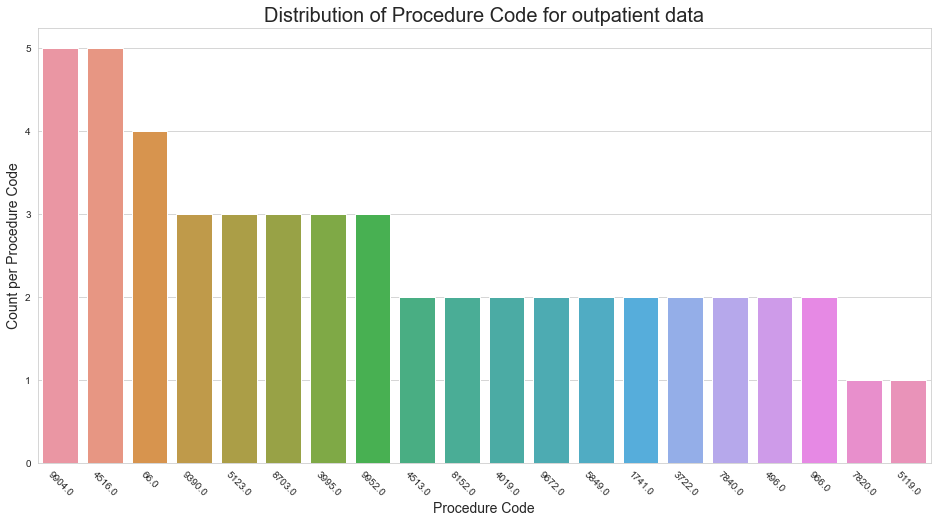

In [59]:
plt.figure(figsize=(16, 8))
sns.countplot(x='ProcedureCode',y=None, data=outpatient_df, orient ="v", order = outpatient_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code for outpatient data', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count per Procedure Code', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

In [60]:
#create a dataframe for concatinating all DiagnosisCode Code columns  

outpatient_df = pd.DataFrame(columns = ['DiagnosisCode'])
outpatient_df['DiagnosisCode'] = pd.concat([fraud_provider_outpatient_df["ClmDiagnosisCode_1"], 
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_2"], 
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_3"], 
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_4"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_5"], 
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_6"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_7"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_8"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_9"],
                                           fraud_provider_outpatient_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

print(outpatient_df.shape)

(494869, 1)


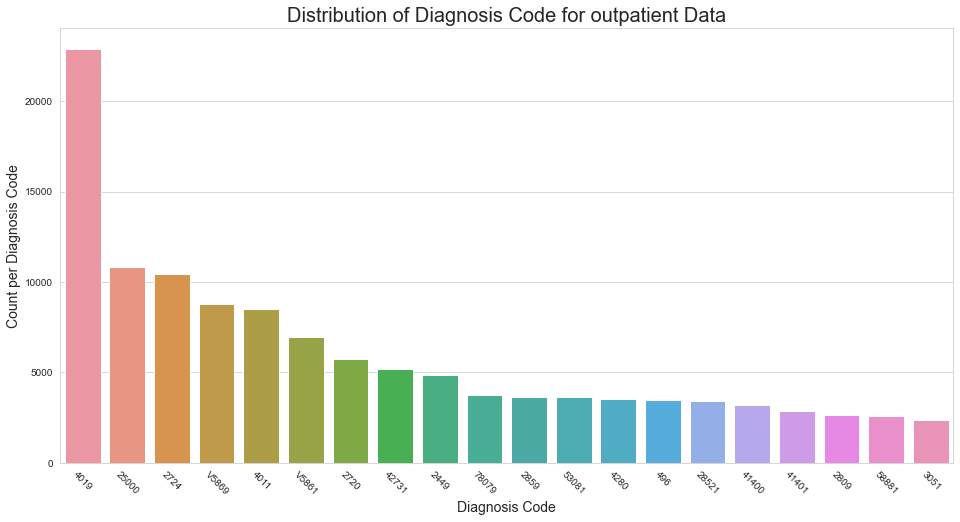

In [61]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=outpatient_df, orient ="v", order = outpatient_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code for outpatient Data', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count per Diagnosis Code', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
plt.show()

## Fraudulent Encounters using beneficiary Data 

## State and County

### Inpatient + fraud + beneficiary data -- more fraud prone State and county

In [62]:
tr_bene_inpat_df = pd.merge(beneficiary_data, fraud_provider_inpatient_df, how='inner', on='BeneID')
print(tr_bene_inpat_df.shape)
tr_bene_inpat_df.head(2)

(23402, 55)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE11017,1940-06-01,NaN,2,1,0,31,270,12,12,...,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN,Yes


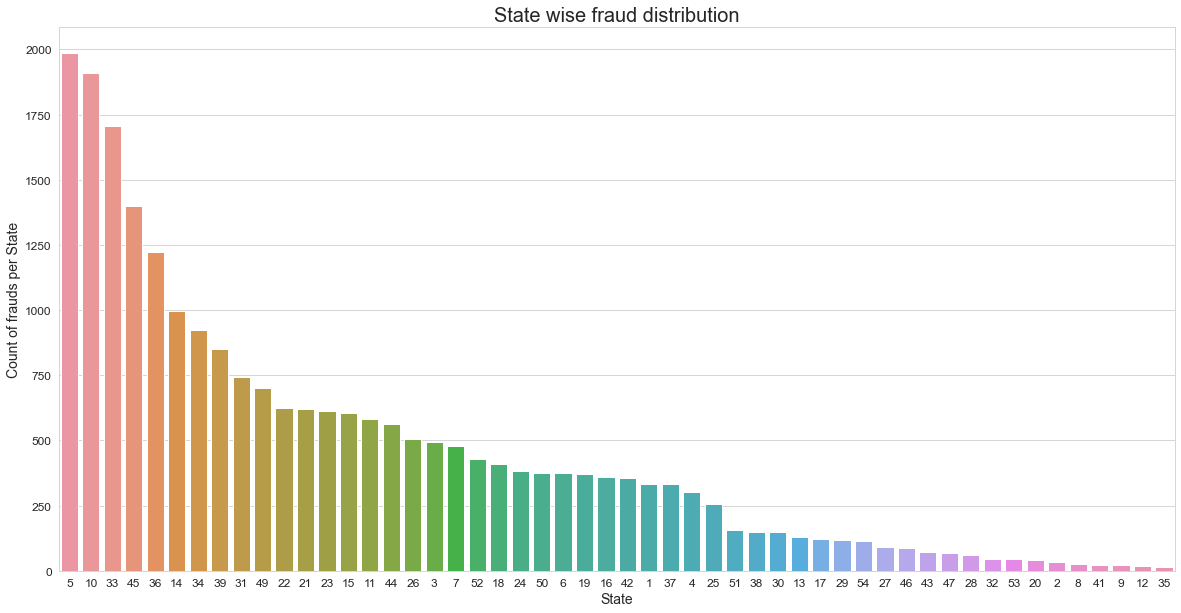

In [63]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='State',y=None, data=tr_bene_inpat_df, orient ="v", order = tr_bene_inpat_df['State'].value_counts().index)
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('State wise fraud distribution', fontsize=20)
plt.xlabel('State', size = 14)
plt.ylabel('Count of frauds per State', size = 14)
plt.show()

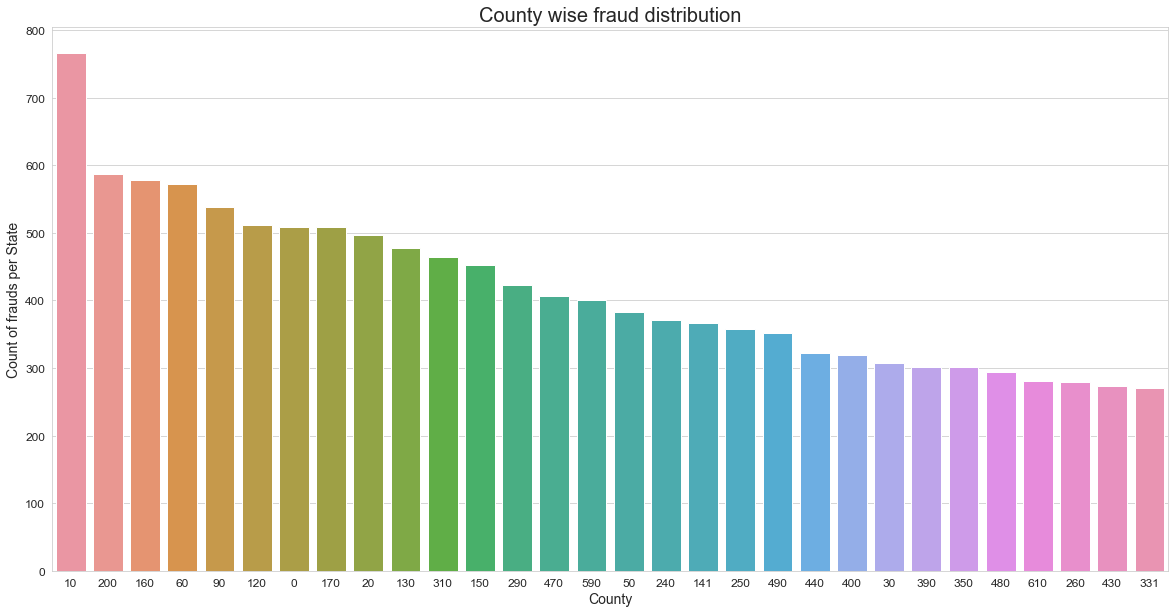

In [64]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='County',y=None, data=tr_bene_inpat_df, orient ="v", order = tr_bene_inpat_df['County'].value_counts().head(30).index)
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('County wise fraud distribution', fontsize=20)
plt.xlabel('County', size = 14)
plt.ylabel('Count of frauds per State', size = 14)
plt.show()

<h2>Conclusion</h2>
<h4> #Inpatient + fraud+ beneficiary data -- more fraud prone State and county</h4>
<ol>
<li>State coded as 5,10,33 and 45 have most fradulent encounters for Inpatient data .</li>
<li>County coded as 10,200,160 and 60 have most fradulent encounters for Inpatient data .</li>


### Outpatient +Fraud  + beneficiary data -- more fraud prone State and county

In [65]:
tr_bene_outpat_df = pd.merge(beneficiary_data, fraud_provider_outpatient_df, how='inner', on='BeneID')
print(tr_bene_outpat_df.shape)
tr_bene_outpat_df.head(2)

(189394, 52)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes


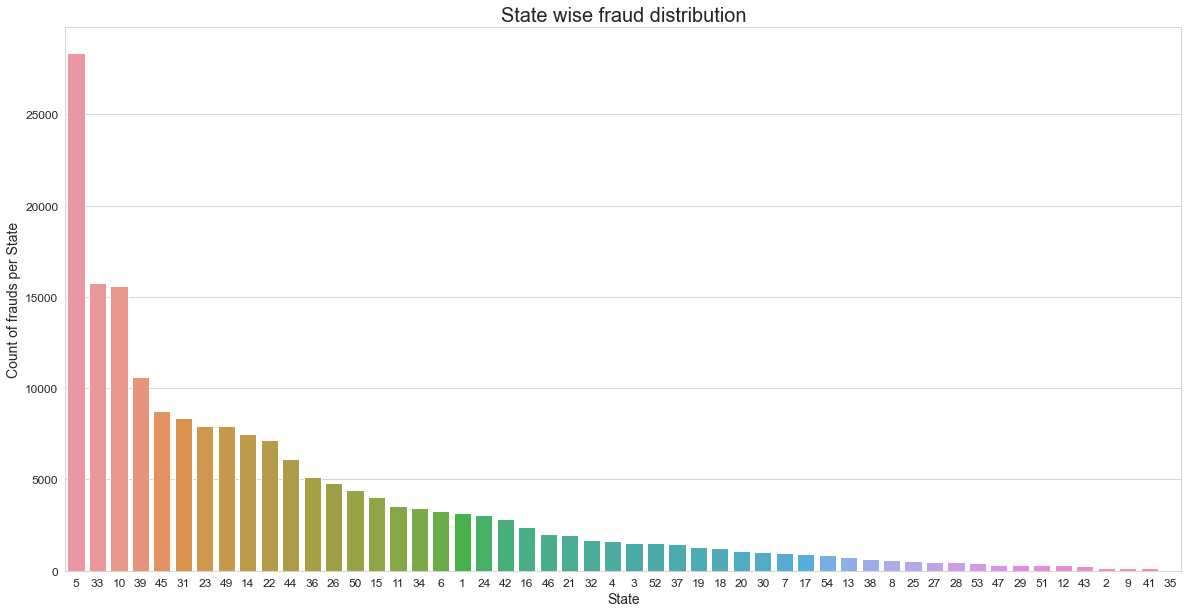

In [66]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='State',y=None, data=tr_bene_outpat_df, orient ="v", order = tr_bene_outpat_df['State'].value_counts().index)
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('State wise fraud distribution', fontsize=20)
plt.xlabel('State', size = 14)
plt.ylabel('Count of frauds per State', size = 14)
plt.show()

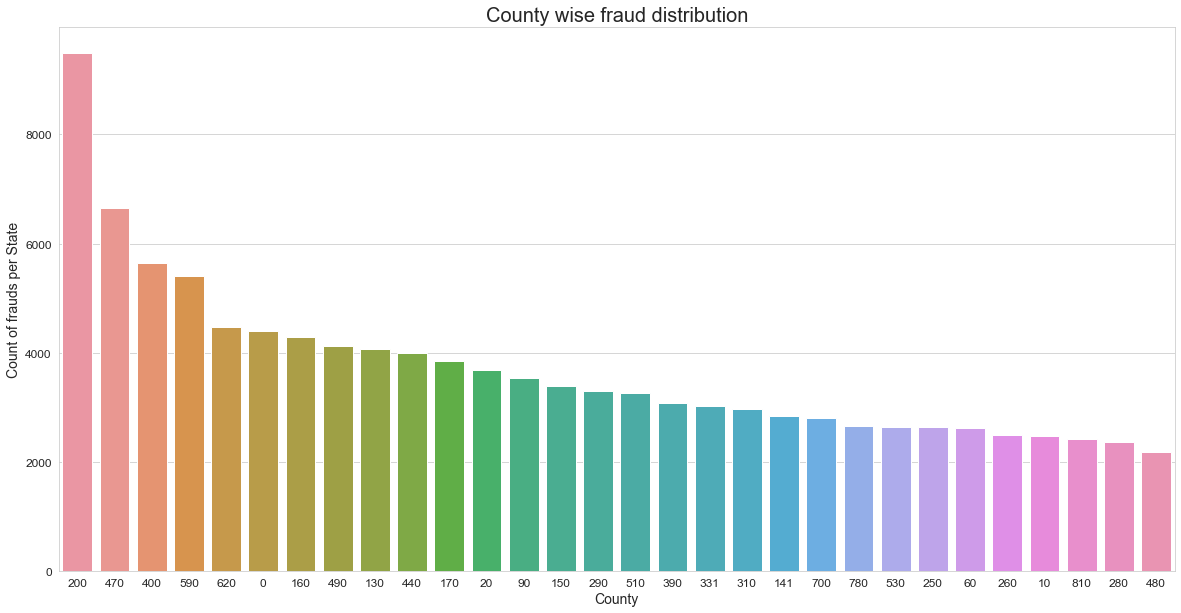

In [67]:
#tr_data_final.State
plt.figure(figsize=(20, 10))
sns.countplot(x='County',y=None, data=tr_bene_outpat_df, orient ="v", order = tr_bene_outpat_df['County'].value_counts().head(30).index)
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('County wise fraud distribution', fontsize=20)
plt.xlabel('County', size = 14)
plt.ylabel('Count of frauds per State', size = 14)
plt.show()

<h2>Conclusion</h2>
<h4> #Outpatient + fraud +beneficiary data -- more fraud prone State and county </h4>
<ol>
<li>State coded as 5,33,10 and 39 have most fradulent encounters for Inpatient data .</li>
<li>County coded as 200,470,400 and 590 have most fradulent encounters for Outpatient data .</li>

## DOB

### Inpatient + Fraud + beneficiary data -- more fraud prone DOB

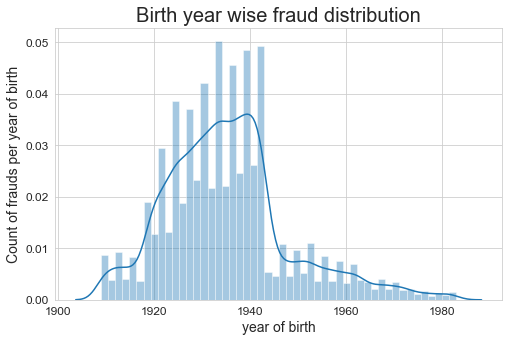

In [68]:
plt.figure(figsize=(8, 5))
tr_bene_inpat_df['DOB']=pd.to_datetime(tr_bene_inpat_df['DOB'], format='%Y-%m-%d')
sns.distplot(pd.DatetimeIndex(tr_bene_inpat_df['DOB']).year)
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('Birth year wise fraud distribution', fontsize=20)
plt.xlabel('year of birth', size = 14)
plt.ylabel('Count of frauds per year of birth', size = 14)
plt.show()

<h2>Conclusion</h2>
<h4> #Inpatient + Fraud - DOB </h4>
<ol>
<li>Most Fradulent ecounters in Inpatatinet Data is observed for the patients born between 1920 and 1945 </li>

### Outpatient + Fraud  + beneficiary data -- more fraud prone DOB

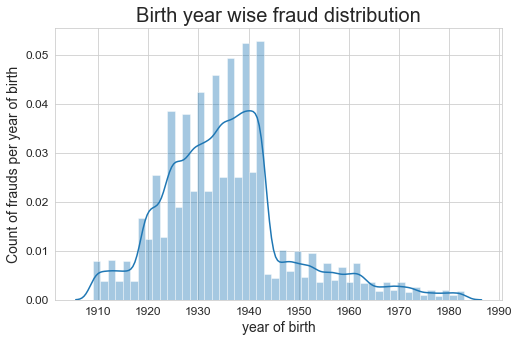

In [69]:
plt.figure(figsize=(8, 5))
tr_bene_inpat_df['DOB']=pd.to_datetime(tr_bene_outpat_df['DOB'], format='%Y-%m-%d')
sns.distplot(pd.DatetimeIndex(tr_bene_outpat_df['DOB']).year)
plt.xticks(size = 12) 
plt.yticks(size = 12) 
plt.title('Birth year wise fraud distribution', fontsize=20)
plt.xlabel('year of birth', size = 14)
plt.ylabel('Count of frauds per year of birth', size = 14)
plt.show()

<h2>Conclusion</h2>
<h4> #Outpatient + Fraud - DOB </h4>
<ol>
<li>Most Fradulent ecounters in Inpatatinet Data is observed for the patients born between 1920 and 1945 </li>

## Money lost in Fraud for both Inpatient and outpatinet data

In [70]:
#merging Inpatint and labeled fradulent providers
inpat_labeled_provider_df = pd.merge(inpatient_data ,label_data , how='inner', on='Provider')
print(inpat_labeled_provider_df.shape)

(40474, 31)


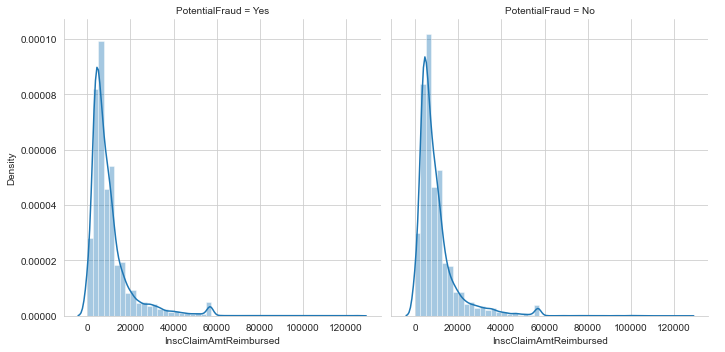

<Figure size 720x360 with 0 Axes>

In [71]:
sns.FacetGrid(inpat_labeled_provider_df, col='PotentialFraud',height=5).map(sns.distplot, "InscClaimAmtReimbursed",).add_legend()
plt.show()
plt.tight_layout();

In [72]:
Total_money_lost_inp = inpat_labeled_provider_df.loc[inpat_labeled_provider_df['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

print("Total money lost : ",Total_money_lost_inp)

Total money lost :  241288510


In [73]:
outpat_labeled_provider_df = pd.merge(outpatient_data , label_data , how='inner', on='Provider')
print(outpat_labeled_provider_df.shape)

(517737, 28)


In [74]:
Total_money_lost_op = outpat_labeled_provider_df.loc[outpat_labeled_provider_df['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

print("Total money lost : ",Total_money_lost_op)

Total money lost :  54392610


In [75]:
 print('Total money lost as per the data for both inpatients and outpatients in 2019 = ',Total_money_lost_inp+Total_money_lost_op )

Total money lost as per the data for both inpatients and outpatients in 2019 =  295681120


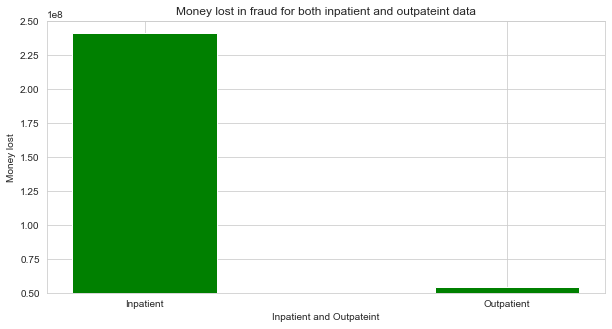

In [76]:
data = {'Inpatient':241288510, 'Outpatient':54392610}
patient = list(data.keys())
money_lost = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(patient, money_lost, color ='green',
        width = 0.4)
plt.ylim(50000000,250000000) 
plt.xlabel("Inpatient and Outpateint")
plt.ylabel("Money lost")
plt.title("Money lost in fraud for both inpatient and outpateint data")
plt.show()